In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [7]:
# 用make_gaussian_quantiles生成多组多维正态分布的数据
# 生成2维正态分布，设定样本数1000，协方差2
x1, y1 = make_gaussian_quantiles(
    cov=2., n_samples=200, n_features=2, n_classes=2, shuffle=True, random_state=1)
# 为了增加样本分布的复杂度，再生成一个数据分布
x2, y2 = make_gaussian_quantiles(mean=(
    3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, shuffle=True, random_state=1)

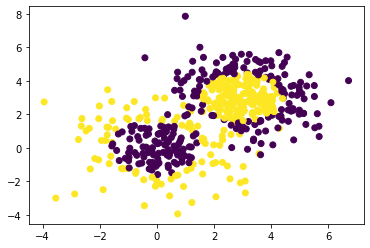

In [3]:
#合并
X=np.vstack((x1,x2))
y=np.hstack((y1,1-y2))
# 绘制生成数据
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
#设定弱分类器CART
weakClassifier=DecisionTreeClassifier(max_depth=2)

In [10]:
#构建模型并进行训练
clf=AdaBoostClassifier(base_estimator=weakClassifier,algorithm='SAMME',n_estimators=300,learning_rate=0.8)
clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.8, n_estimators=300)

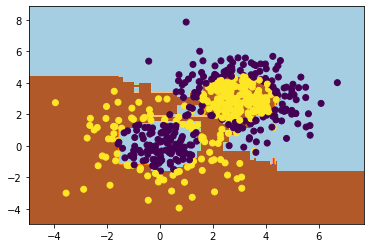

In [16]:
# 结果绘制
#绘制分类效果
x1_min=X[:,0].min()-1
x1_max=X[:,0].max()+1
x2_min=X[:,1].min()-1
x2_max=X[:,1].max()+1
x1_,x2_=np.meshgrid(np.arange(x1_min,x1_max,0.02),np.arange(x2_min,x2_max,0.02))
# 模型预测
y_=clf.predict(np.c_[x1_.ravel(),x2_.ravel()])
y_=y_.reshape(x1_.shape)
plt.contourf(x1_,x2_,y_,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()